<a href="https://colab.research.google.com/github/nkr9/Data-Analyst/blob/main/clustering_(Wholesale)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Dataset

In [ ]:
df = pd.read_csv("Wholesale.csv")

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## 1. Fit K means clustering

1. a) Find optimal number of clusters

### Normalize dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

### Applying elbow method

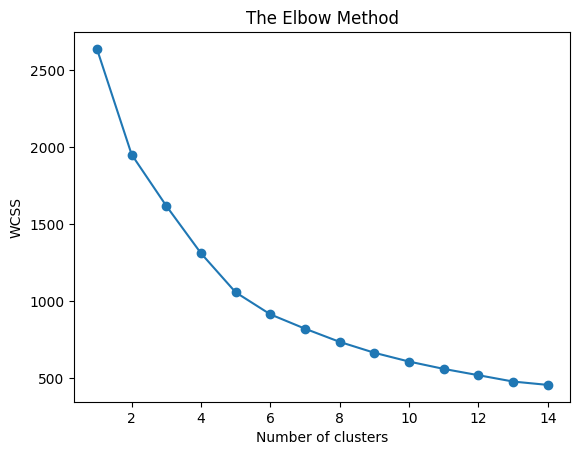

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The plot indicates elbow point at 5, which implies there might be 5 clusters

b) Creating Clusters

In [ ]:
k = 5

clusters = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = clusters.fit_predict(scaled_df)
df["clusterid"] = clusters.labels_

c) Interpret the Clusters

In [ ]:
# Print each cluster iteratively
for i in range(k):
  print(f"\nCluster {i}:")
  print(df[df['clusterid'] == i])


Cluster 0:
     Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669  9656     7561     214              2674   
3          1       3  13265  1196     4221    6404               507   
5          2       3   9413  8259     5126     666              1795   
6          2       3  12126  3199     6975     480              3140   
7          2       3   7579  4956     9426    1669              3321   
..       ...     ...    ...   ...      ...     ...               ...   
432        1       3  21117  1162     4754     269              1328   
433        1       3   1982  3218     1493    1541               356   
434        1       3  16731  3922     7994     688              2371   
438        1       3  10290  1981     2232    1038               168   
439        1       3   2787  1698     2510      65               477   

     Delicassen  clusterid  
0          1338          0  
3          1788          0  
5          1451          0  
6      

## 2. Fit hierarchical clustering

### a) Use Dendogram method

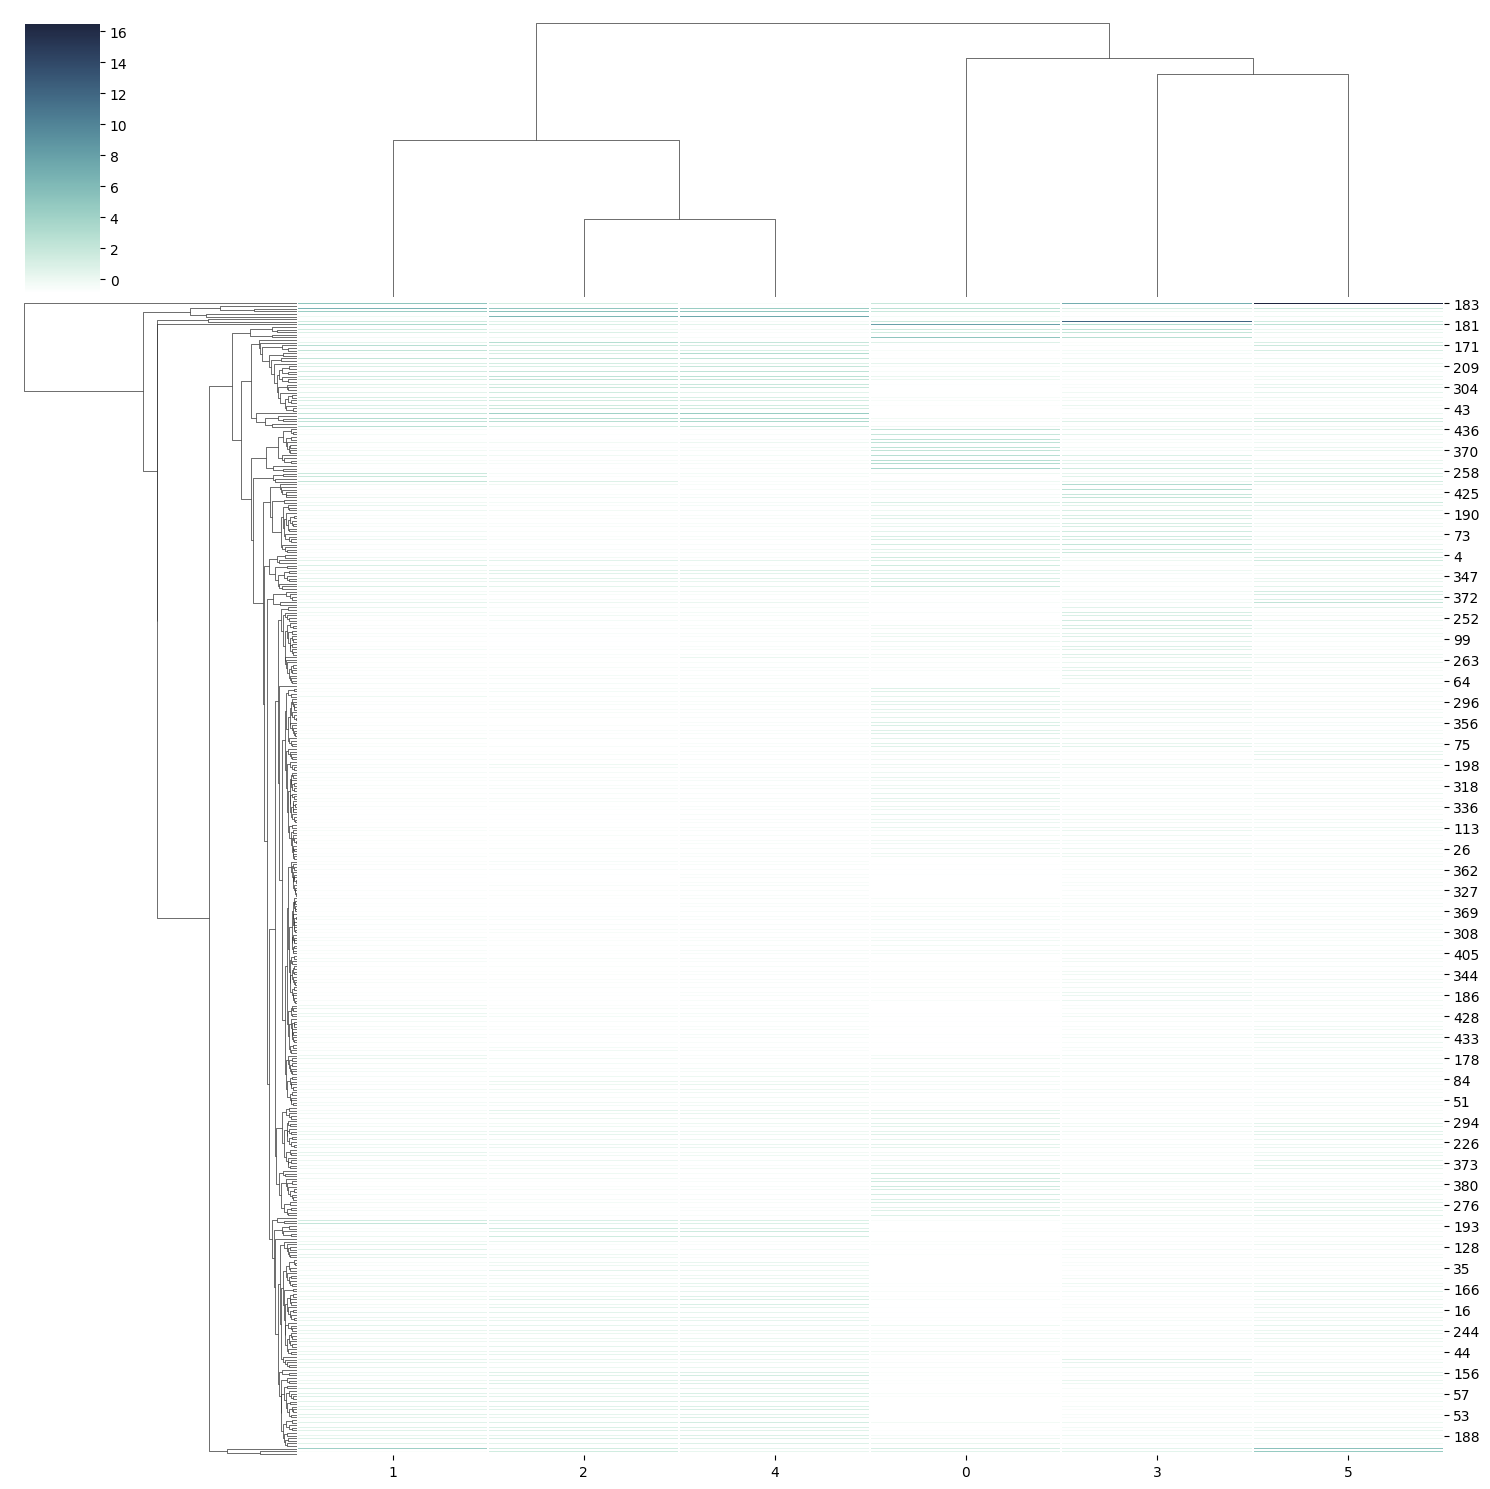

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cmap = sns.cubehelix_palette(light=1, as_cmap=True, rot=-0.3)

sns.clustermap(scaled_df, cmap=cmap, linewidths=.2,figsize=(15,15))

From Dendrogram plot, we can say there should be 5 clusters.

In [ ]:
h_clusters = AgglomerativeClustering(5)
h_clusters.fit(scaled_df)
df["h_clusterid"] = h_clusters.labels_

### Compare the Clusters Created by K-Means and Hierarchical Clustering

In [ ]:
for i in range(k):
  print(f"\nHierarchical Cluster {i}:")
  print(df[df['h_clusterid'] == i])


Hierarchical Cluster 0:
     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
5          2       3   9413   8259     5126     666              1795   
6          2       3  12126   3199     6975     480              3140   
..       ...     ...    ...    ...      ...     ...               ...   
424        2       3  16980   2884    12232     874              3213   
426        1       3  13134   9347    14316    3141              5079   
430        1       3   3097   4230    16483     575               241   
434        1       3  16731   3922     7994     688              2371   
437        2       3  14531  15488    30243     437             14841   

     Delicassen  clusterid  h_clusterid  
0          1338          0            0  
1          177

Comparison of KMeans and Hierarchical Clustering:

h_clusterid   0  1   2  3    4
clusterid                     
0            55  0  38  0  177
1             5  5   0  0    0
2             0  0   0  1    0
3             1  0  62  0    0
4            92  0   4  0    0

Adjusted Rand Index (ARI): 0.40444803476580143


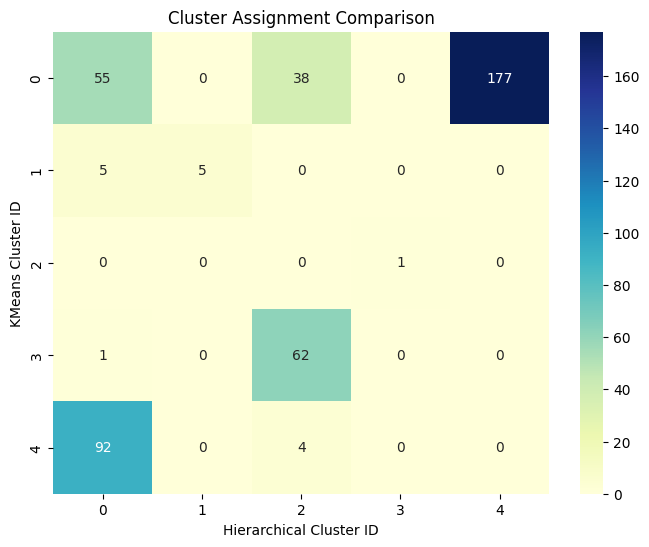

In [ ]:
# Create a cross-tabulation to compare cluster assignments.
comparison_table = pd.crosstab(df['clusterid'], df['h_clusterid'])
print("Comparison of KMeans and Hierarchical Clustering:\n")
print(comparison_table)

# Calculate the similarity between the two clustering approaches using Adjusted Rand Index
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(df['clusterid'], df['h_clusterid'])
print(f"\nAdjusted Rand Index (ARI): {ari}")


#Interpretation:
#ARI ranges from -1 to 1, where:
# 1 indicates perfect agreement between the two clusterings
# 0 indicates random agreement
# -1 indicates perfect disagreement
# Analyze the crosstabulation and ARI to understand how well the two approaches aligned.
# High ARI and diagonal dominance in the crosstab suggest high similarity between results.


# Visualize the comparison if needed (optional):
plt.figure(figsize=(8, 6))
sns.heatmap(comparison_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Cluster Assignment Comparison")
plt.xlabel("Hierarchical Cluster ID")
plt.ylabel("KMeans Cluster ID")
plt.show()
